In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import tangermeme
from SAGEnet.data import ReferenceGenomeDataset, VariantDataset
import SAGEnet.attributions
import SAGEnet.plot
import SAGEnet.tools

/homes/gws/aspiro17/miniconda3/envs/SAGEnet/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/homes/gws/aspiro17/miniconda3/envs/SAGEnet/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
2025-07-31 14:42:54.643973: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/homes/gws/aspiro17/miniconda3/envs/SAGEnet/lib/python3.10/site-packages/tensorflo

#### load data

In [5]:
gene_of_interest = 'ENSG00000134202'
tss_data_path='/homes/gws/aspiro17/SAGEnet/input_data/gene-ids-and-positions.tsv'
hg38_file_path='/data/tuxm/project/Decipher-multi-modality/data/genome/hg38.fa'
input_len=40000
pos_of_interest = 109731286
ism_win_size=150
pos_idx_in_seq = SAGEnet.tools.get_pos_idx_in_seq(gene_of_interest,pos_of_interest,tss_data_path,input_len=input_len,allow_reverse_complement=False)
start_of_interest_idx = pos_idx_in_seq-ism_win_size//2
end_of_interest_idx = pos_idx_in_seq+ism_win_size//2

In [4]:
gene_meta_info = pd.read_csv(tss_data_path, sep="\t")
selected_genes_meta = gene_meta_info.set_index('ensg', drop=False).loc[[gene_of_interest]]
dataset = ReferenceGenomeDataset(gene_metadata=selected_genes_meta,hg38_file_path=hg38_file_path,allow_reverse_complement=0,input_len=input_len,single_seq=True)
rel_ref_seq = dataset[0][0][:,start_of_interest_idx:end_of_interest_idx].numpy()
rel_ref_seq.shape

(4, 150)

In [5]:
# create variant df 
ism_ex_df = pd.DataFrame()
variant_nuc='T'
ism_ex_df['gene'] = [gene_of_interest]
ism_ex_df['chr'] = selected_genes_meta['chr'].values
ism_ex_df['pos'] = [pos_of_interest]
ism_ex_df['ref'] = ['G']
ism_ex_df['alt'] = [variant_nuc]
#ism_ex_df.to_csv('/data/mostafavilab/personal_genome_expr/attributions/ism/ENSG00000134202_ism_ex.csv')

var_inserted_dataset = VariantDataset(gene_metadata=selected_genes_meta,hg38_file_path=hg38_file_path,variant_info = ism_ex_df,allow_reverse_complement=0,input_len=input_len,single_seq=True)
rel_ref_seq_var_inserted = var_inserted_dataset[0][0][:,start_of_interest_idx:end_of_interest_idx].numpy()
rel_ref_seq_var_inserted.shape

inserting variants


(4, 150)

In [7]:
fig_save_dir='/homes/gws/aspiro17/SAGEnet/plot_figs/figs/'

#### ISM example

##### pSAGEnet 

attributions.shape:(4, 150)
mean.shape:(1, 150)
centered.shape:(4, 150)
attributions.shape:(4, 150)
mean.shape:(1, 150)
centered.shape:(4, 150)


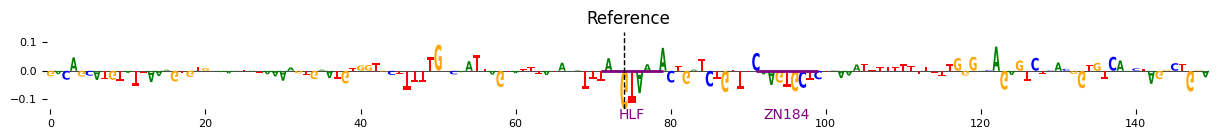

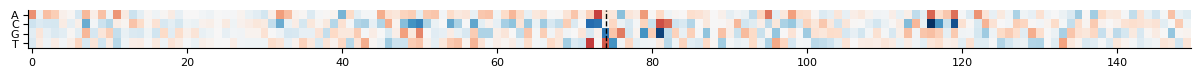

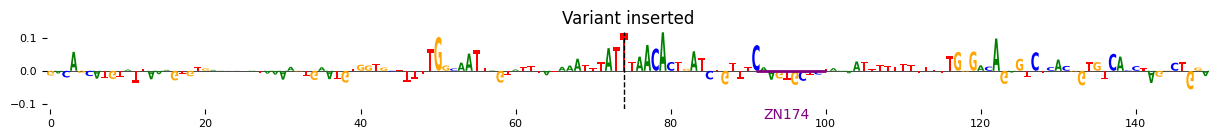

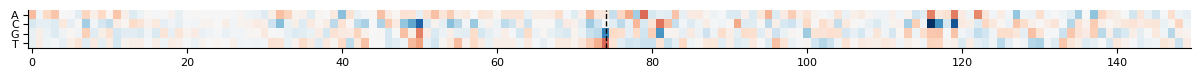

In [8]:
personal_model = np.load(f'/data/mostafavilab/personal_genome_expr/attributions/ism/personal_model/{gene_of_interest}_ism_res.npy')
var_personal_model = np.load(f'/data/mostafavilab/personal_genome_expr/attributions/ism/personal_model/{gene_of_interest}_{variant_nuc}_inserted_ism_res.npy')
personal_model_personal_out = personal_model[1,:,:,1]
var_personal_model_personal_out = var_personal_model[1,:,:,1]

personal_model_personal_out=SAGEnet.tools.mean_center_attributions(personal_model_personal_out,axis=0)
var_personal_model_personal_out=SAGEnet.tools.mean_center_attributions(var_personal_model_personal_out,axis=0)
seqlets_personal_model_personal_out = SAGEnet.attributions.get_annotated_seqlets(personal_model_personal_out,rel_ref_seq)
seqlets_var_personal_model_personal_out = SAGEnet.attributions.get_annotated_seqlets(var_personal_model_personal_out,rel_ref_seq_var_inserted)

SAGEnet.plot.plot_attribs(personal_model_personal_out*rel_ref_seq,'Reference',annotations=seqlets_personal_model_personal_out,center_line=True,save_dir=fig_save_dir,save_name='fig_s3a')
SAGEnet.plot.plot_heatmap(personal_model_personal_out,center_line=True,save_dir=fig_save_dir,save_name='fig_s3b')
SAGEnet.plot.plot_attribs(var_personal_model_personal_out*rel_ref_seq_var_inserted,'Variant inserted',annotations=seqlets_var_personal_model_personal_out,center_line=True,save_dir=fig_save_dir,save_name='fig_s3c')
SAGEnet.plot.plot_heatmap(var_personal_model_personal_out,center_line=True,save_dir=fig_save_dir,save_name='fig_s3d')

##### rSAGEnet

attributions.shape:(4, 150)
mean.shape:(1, 150)
centered.shape:(4, 150)
attributions.shape:(4, 150)
mean.shape:(1, 150)
centered.shape:(4, 150)


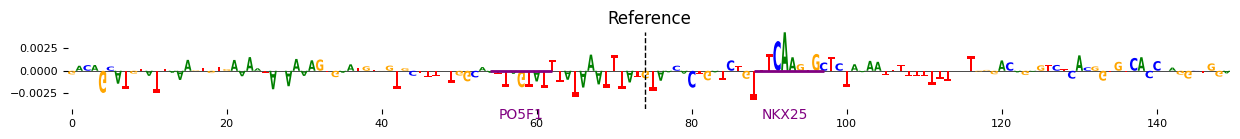

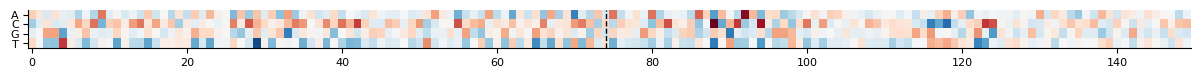

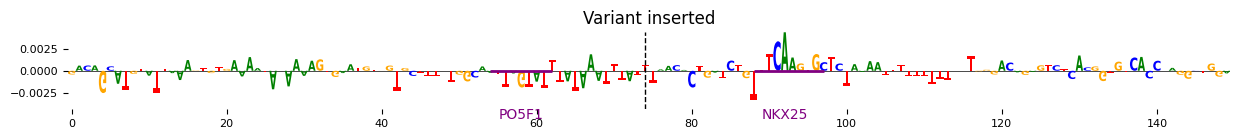

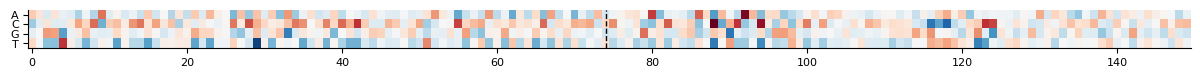

In [9]:
ref_model = np.load(f'/data/mostafavilab/personal_genome_expr/attributions/ism/ref_model/{gene_of_interest}_ism_res.npy')
var_ref_model = np.load(f'/data/mostafavilab/personal_genome_expr/attributions/ism/ref_model/{gene_of_interest}_{variant_nuc}_inserted_ism_res.npy')

ref_model=SAGEnet.tools.mean_center_attributions(ref_model,axis=0)
var_ref_model=SAGEnet.tools.mean_center_attributions(var_ref_model,axis=0)
seqlets_ref_model = SAGEnet.attributions.get_annotated_seqlets(ref_model,rel_ref_seq)
seqlets_var_ref_model = SAGEnet.attributions.get_annotated_seqlets(var_ref_model,rel_ref_seq_var_inserted)

SAGEnet.plot.plot_attribs(ref_model*rel_ref_seq,'Reference',annotations=seqlets_ref_model,center_line=True,save_dir=fig_save_dir,save_name='fig_s4a')
SAGEnet.plot.plot_heatmap(ref_model,center_line=True,save_dir=fig_save_dir,save_name='fig_s4b')
SAGEnet.plot.plot_attribs(var_ref_model*rel_ref_seq_var_inserted,'Variant inserted',annotations=seqlets_var_ref_model,center_line=True,save_dir=fig_save_dir,save_name='fig_s4c')
SAGEnet.plot.plot_heatmap(var_ref_model,center_line=True,save_dir=fig_save_dir,save_name='fig_s4d')

##### enformer 

attributions.shape:(4, 150)
mean.shape:(1, 150)
centered.shape:(4, 150)
attributions.shape:(4, 150)
mean.shape:(1, 150)
centered.shape:(4, 150)
error in get_annotated_seqlets: need at least one array to concatenate


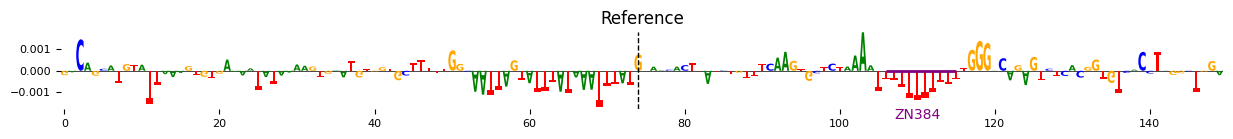

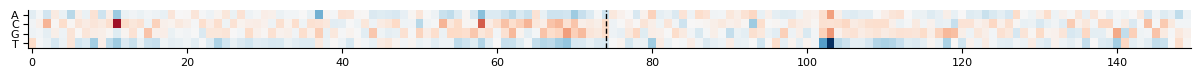

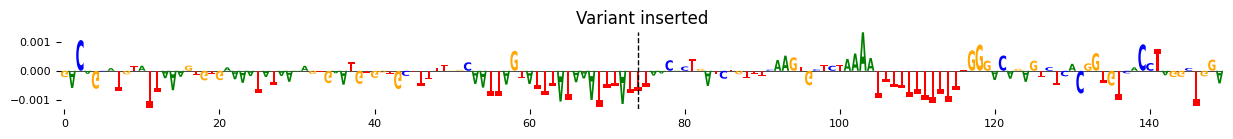

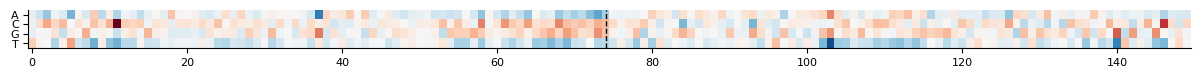

In [11]:
enformer = np.load(f'/data/mostafavilab/personal_genome_expr/attributions/ism/enformer_model/{gene_of_interest}_ism_res.npy')
var_enformer= np.load(f'/data/mostafavilab/personal_genome_expr/attributions/ism/enformer_model/{gene_of_interest}_{variant_nuc}_inserted_ism_res.npy')

enformer=SAGEnet.tools.mean_center_attributions(enformer,axis=0)
var_enformer=SAGEnet.tools.mean_center_attributions(var_enformer,axis=0)
seqlets_enformer = SAGEnet.attributions.get_annotated_seqlets(enformer,rel_ref_seq)
seqlets_var_enformer = SAGEnet.attributions.get_annotated_seqlets(var_enformer,rel_ref_seq_var_inserted)

SAGEnet.plot.plot_attribs(enformer*rel_ref_seq,'Reference',annotations=seqlets_enformer,center_line=True,save_dir=fig_save_dir,save_name='fig_s5a')
SAGEnet.plot.plot_heatmap(enformer,center_line=True,save_dir=fig_save_dir,save_name='fig_s5b')
SAGEnet.plot.plot_attribs(var_enformer*rel_ref_seq_var_inserted,'Variant inserted',annotations=seqlets_var_enformer,center_line=True,save_dir=fig_save_dir,save_name='fig_s5c')
SAGEnet.plot.plot_heatmap(var_enformer,center_line=True,save_dir=fig_save_dir,save_name='fig_s5d')

#### seqlet position analysis

In [2]:
high_performance_train_genes = np.load('/data/mostafavilab/personal_genome_expr/attributions/gradients/high_performance_genes.npy',allow_pickle=True)
high_performance_train_genes.shape

(466,)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

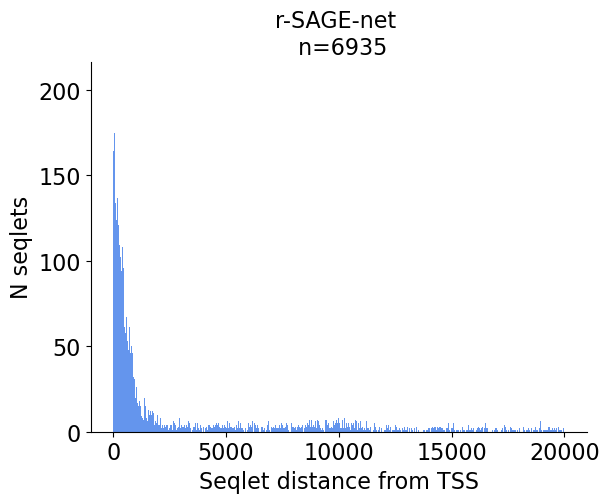

In [8]:
ref_model_dir='/data/mostafavilab/personal_genome_expr/attributions/gradients/ref_model/eval_on_ref_seq/centered_grads_analysis/additional_flanks=2/'
personal_model_personal_dir='/data/mostafavilab/personal_genome_expr/attributions/gradients/personal_model/metric_train_gene_gene/eval_on_ref_seq/epoch=8.ckpt/centered_personal_seq_1_idx_grads_analysis/additional_flanks=2/'

personal_model_personal_summary = SAGEnet.attributions.summarize_seqlet_annotations(personal_model_personal_dir,high_performance_train_genes,seqlet_threshold=0.005)
ref_model_summary = SAGEnet.attributions.summarize_seqlet_annotations(ref_model_dir,high_performance_train_genes,seqlet_threshold=0.005)

SAGEnet.plot.plot_hist(np.abs(input_len//2-personal_model_personal_summary[2]),xlabel='Seqlet distance from TSS',ylabel='N seqlets',title='p-SAGE-net',show_x0=False,show_mean=False,bins=1000,save_dir=fig_save_dir,save_name='fig_s6a')
SAGEnet.plot.plot_hist(np.abs(input_len//2-ref_model_summary[2]),xlabel='Seqlet distance from TSS',ylabel='N seqlets',title='r-SAGE-net',show_x0=False,show_mean=False,bins=1000,save_dir=fig_save_dir,save_name='fig_s6b')

<Figure size 640x480 with 0 Axes>

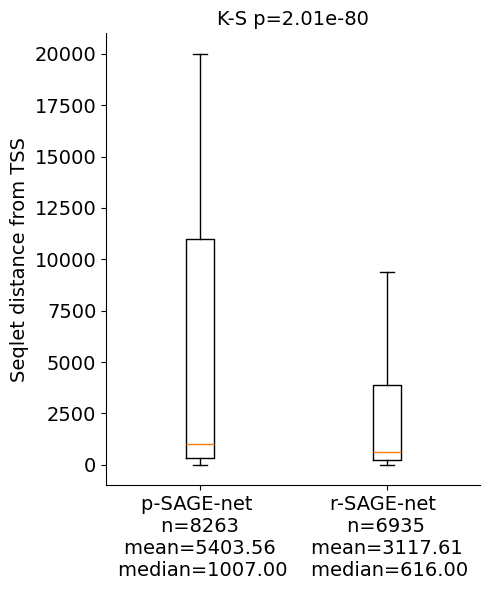

In [10]:
input_len=40000
SAGEnet.plot.boxplot_compare(np.abs(input_len//2-personal_model_personal_summary[2]),np.abs(input_len//2-ref_model_summary[2]),stat_test='ks',arra_t='p-SAGE-net',arrb_t='r-SAGE-net',ylabel='Seqlet distance from TSS',fig_width=5,fontsize=14)

#### DNAm

In [2]:
cluster_dir='/data/aspiro17/DNAm_and_expression/attributions/rsagenet_psagenet_100k_comb/'
all_annotations=SAGEnet.attributions.load_annotations(cluster_dir,cluster_match_threshold=-1,n_seqlets_threshold=-1,output_suffix='')
all_annotations = all_annotations[all_annotations["raw_pval"] != 0] # error for	AHR.H12CORE.0.P.B 
seqlet_ids=np.load(f'{cluster_dir}seqlet_ids.npy')

In [3]:
all_annotations

,cluster_idx,motif_match,raw_pval,bh_corrected_pval,strand,n_seqlets
0,0,ZN790.H12CORE.1.P.C,0.001205,0.051178,1,28
1,0,ZN563.H12CORE.1.P.C,0.002774,0.104622,0,28
2,0,ZFP1.H12CORE.0.PSM.A,0.005280,0.172116,1,28
3,0,ZN790.H12CORE.0.P.C,0.007252,0.216010,1,28
4,0,OLIG2.H12CORE.0.P.B,0.009024,0.250730,1,28
...,...,...,...,...,...,...
925,105,ZN649.H12CORE.0.P.C,0.000095,0.004698,0,4
926,105,ZN284.H12CORE.0.P.C,0.000171,0.008347,0,4
927,105,ZN692.H12CORE.0.P.C,0.000380,0.017864,1,4
928,105,ZN771.H12CORE.0.SM.B,0.000555,0.025460,0,4


In [4]:
model_to_attrib_dir_dict={}
model_to_attrib_dir_dict['rsagenet']='/data/aspiro17/DNAm_and_expression/rsagenet/dnam/rosmap/input_len_10000/attribs/sagenet_revision/epoch=14-step=108183.ckpt/grad/'
model_to_attrib_dir_dict['psagenet_concat_100k_idx1']='/data/aspiro17/DNAm_and_expression/psagenet/dnam/rosmap/scale_psagenet_concat/26811096/attribs/epoch=0.ckpt/grad/output_idx_1/'

In [5]:
seqlet_info=SAGEnet.attributions.load_seqlet_info(cluster_dir,model_to_attrib_dir_dict)

In [7]:
seqlet_info

,cluster_ids,region_id,seqlet_idx,model,attribution,starts,ends
cg13772218_0_rsagenet,60,cg13772218,0,rsagenet,-0.423918,4970,4985
cg13772218_1_rsagenet,98,cg13772218,1,rsagenet,0.296791,4944,4951
cg13772218_2_rsagenet,50,cg13772218,2,rsagenet,0.185564,5035,5055
cg13772218_3_rsagenet,3,cg13772218,3,rsagenet,0.293954,4960,4965
cg13772218_4_rsagenet,60,cg13772218,4,rsagenet,-0.175863,4933,4942
...,...,...,...,...,...,...,...
cg14239592_4_psagenet_concat_100k_idx1,19,cg14239592,4,psagenet_concat_100k_idx1,0.473242,5236,5242
cg14239592_5_psagenet_concat_100k_idx1,19,cg14239592,5,psagenet_concat_100k_idx1,0.381075,4857,4863
cg14239592_6_psagenet_concat_100k_idx1,85,cg14239592,6,psagenet_concat_100k_idx1,0.348126,5484,5495
cg14239592_7_psagenet_concat_100k_idx1,67,cg14239592,7,psagenet_concat_100k_idx1,-0.451414,5094,5113


In [8]:
cluster_motifs = tangermeme.io.read_meme(f'{cluster_dir}/cluster_cwms.meme')

In [9]:
condensed_annotations = all_annotations.loc[all_annotations.groupby('cluster_idx')['bh_corrected_pval'].idxmin()]
seqlet_cutoff = condensed_annotations['n_seqlets'].quantile(0.5)
top_by_seqlets = condensed_annotations[condensed_annotations['n_seqlets'] >= seqlet_cutoff]['cluster_idx']

mean_abs_attrib=[]
for cluster in condensed_annotations['cluster_idx']:
    mean_abs_attrib.append(np.abs(seqlet_info[seqlet_info['cluster_ids']==cluster]['attribution']).mean())
condensed_annotations['mean_abs_attrib'] = mean_abs_attrib
mean_abs_cutoff=condensed_annotations['mean_abs_attrib'].quantile(0.5)
top_by_attrib = condensed_annotations[condensed_annotations['mean_abs_attrib'] >= mean_abs_cutoff]['cluster_idx']

top_by_seqlets_and_attrib_clusters = set(top_by_seqlets) & set(top_by_attrib)
top_by_seqlets_and_attrib=condensed_annotations[condensed_annotations['cluster_idx'].isin(top_by_seqlets_and_attrib_clusters)]
len(top_by_seqlets_and_attrib)

top_by_seqlets_and_attrib = top_by_seqlets_and_attrib.loc[
    top_by_seqlets_and_attrib.groupby("motif_match")["bh_corrected_pval"].idxmin()
]

top_by_seqlets_and_attrib=top_by_seqlets_and_attrib.sort_values('bh_corrected_pval')
top_by_seqlets_and_attrib.iloc[:10]

,cluster_idx,motif_match,raw_pval,bh_corrected_pval,strand,n_seqlets,mean_abs_attrib
577,71,CTCFL.H12CORE.0.P.B,1.243672e-12,6.589178e-11,1,54,0.316002
790,93,VEZF1.H12CORE.0.P.C,9.479151e-11,5.018733e-09,1,102,0.316850
159,26,KLF11.H12CORE.0.P.B,2.528162e-10,1.338071e-08,1,69,0.375093
593,73,CTCF.H12CORE.0.P.B,1.347241e-09,7.125562e-08,0,39,0.303463
73,12,ZEB2.H12CORE.0.P.B,6.999332e-07,3.658933e-05,0,277,0.336584
109,16,ZN250.H12CORE.1.M.C,8.705107e-07,4.547527e-05,0,176,0.345697
416,46,ZBT14.H12CORE.0.P.C,8.551165e-06,4.406904e-04,1,70,0.379677
257,31,KLF9.H12CORE.1.P.B,1.400380e-05,7.187894e-04,0,87,0.337986
448,52,ZN784.H12CORE.0.SM.B,1.529192e-05,7.838545e-04,0,26,0.307817
124,19,ZFX.H12CORE.0.P.B,1.867889e-05,9.549081e-04,0,948,0.363241


/homes/gws/aspiro17/SAGEnet/SAGEnet/plot.py:157: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


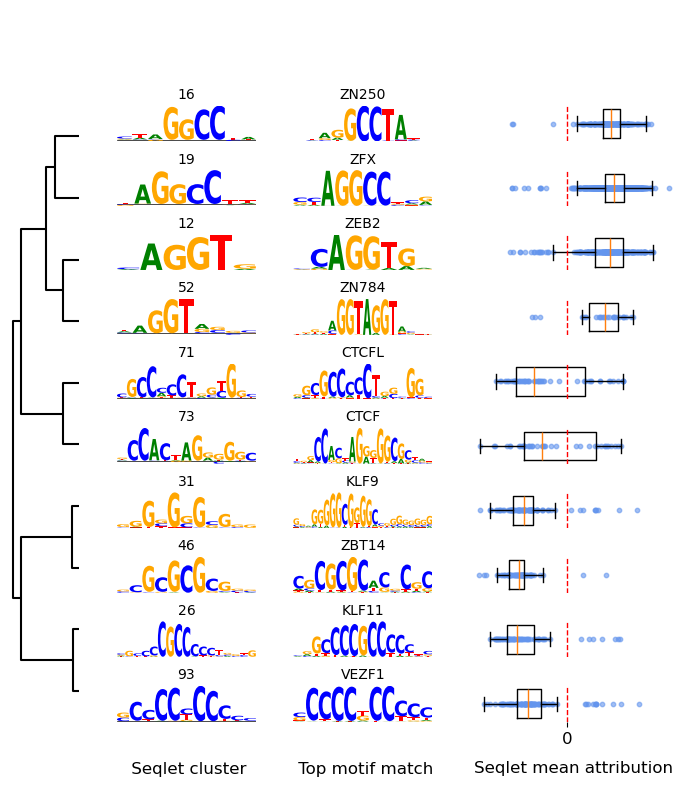

In [10]:
rel_cluster_ids = top_by_seqlets_and_attrib.iloc[:10]['cluster_idx'].values

cluster_motifs = tangermeme.io.read_meme(f'{cluster_dir}/cluster_cwms.meme')
# filter keys 
keys = []
values = []
for k, v in cluster_motifs.items():
    k = int(k.split(' ')[0])
    if k in rel_cluster_ids and v.shape[1] > 3:
        keys.append(k)
        values.append(v.numpy())

motif_labels = SAGEnet.attributions.get_top_motif_labels(all_annotations,keys)
SAGEnet.plot.plot_motif_tree(seqlet_info, values, keys, motif_labels,show_p=False)

In [13]:
motif_labels

['12:ZEB2.H12CORE.0.P.B:0:3.66e-05',
 '16:ZN250.H12CORE.1.M.C:0:4.55e-05',
 '19:ZFX.H12CORE.0.P.B:0:9.55e-04',
 '26:KLF11.H12CORE.0.P.B:1:1.34e-08',
 '31:KLF9.H12CORE.1.P.B:0:7.19e-04',
 '46:ZBT14.H12CORE.0.P.C:1:4.41e-04',
 '52:ZN784.H12CORE.0.SM.B:0:7.84e-04',
 '71:CTCFL.H12CORE.0.P.B:1:6.59e-11',
 '73:CTCF.H12CORE.0.P.B:0:7.13e-08',
 '93:VEZF1.H12CORE.0.P.C:1:5.02e-09']